# Regresi Kuadrat Terkecil (*Least Squares*)

## Definisi

Regresi adalah salah satu metode pencocokan kurva dari sejumlah titik data, mirip dengan interpolasi. Interpolasi memperkirakan nilai antara titik data yang diketahui, sementara regresi menemukan hubungan seperti persamaan garis yang paling sesuai dengan data, memungkinkan prediksi di luar rentang data yang diketahui. Salah satu pendefinisian yang cukup ketat yang membedakan regresi dari interpolasi adalah bahwa kurva hasil proses interpolasi disyaratkan selalu menyentuh titik-titik data asli, sementara proses regresi tidak mensyaratkan itu. Kedua istilah (regresi dan interpolasi) seringkali tertukar-tukar, tetapi kita tidak perlu pusing, yang penting mampu melakukan keduanya dengan metode numerik/komputasi tertentu.

Metode regresi kuadrat terkecil (*least squares*) adalah salah satu metode fundamental dalam pemodelan numerik yang digunakan untuk menemukan fungsi estimasi terbaik dari sekumpulan data. Diberikan data berupa pasangan titik $(x_i, y_i)$ dengan $i = 1, 2, ..., m$, tujuan utama dari regresi kuadrat terkecil adalah untuk membangun suatu fungsi estimasi $\hat{y}(x)$ yang meminimalkan selisih kuadrat antara nilai estimasi dan data aktual.

Fungsi estimasi diasumsikan sebagai kombinasi linear dari fungsi basis:

$$
\hat{y}(x) = \sum_{i=1}^n \alpha_i f_i(x)
$$

dengan:
- $ \alpha_i $: parameter model yang akan dicari,
- $ f_i(x) $: fungsi basis yang saling bebas linear.

Biasanya, jumlah data $m$ jauh lebih banyak dibanding jumlah fungsi basis $n$, yaitu $ m \gg n $.

Target dari regresi kuadrat terkecil adalah meminimalkan total error kuadrat berikut ini:

$$
E = \sum_{i=1}^m (\hat{y}(x_i) - y_i)^2 = \| \mathbf{e} \|^2
$$

dengan $ \mathbf{e} $ adalah vektor error (residual) dalam representasi matriks kolom.


## Penurunan Rumus Regresi Least Squares

### (1) Pendekatan Aljabar Linear

Kita nyatakan setiap estimasi $ \hat{y}(x_i) $ sebagai:

$$
\hat{y}(x_i) = \alpha_1 f_1(x_i) + \alpha_2 f_2(x_i) + \cdots + \alpha_n f_n(x_i)
$$

Selanjutnya, kita bentuk sistem linear:

- Vektor $ \mathbf{Y} = [y_1, y_2, ..., y_m]^T $
- Vektor parameter $ \boldsymbol{\beta} = [\alpha_1, \alpha_2, ..., \alpha_n]^T $
- Matriks $ \mathbf{A} \in \mathbb{R}^{m \times n} $ dengan $ A_{ij} = f_j(x_i) $

Maka, kita akan memiliki sistem persamaan linear:

$$
\mathbf{\hat{Y}} = \mathbf{A} \boldsymbol{\beta}
$$

Total error menjadi:

$$
E = \| \mathbf{Y} - \mathbf{A}\boldsymbol{\beta} \|^2
$$

Minimum error terjadi saat gradiennya nol:

$$
\frac{dE}{d\boldsymbol{\beta}} = 0 \Rightarrow \mathbf{A}^T \mathbf{A} \boldsymbol{\beta} = \mathbf{A}^T \mathbf{Y}
$$

Solusi parameter:

$$
\boldsymbol{\beta} = (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T \mathbf{Y}
$$


### Pendekatan Kalkulus

Pendekatan kalkulus memandang total error $ E $ sebagai fungsi dari parameter $ \alpha_i $. Kita nyatakan:

$$
E = \sum_{i=1}^m \left( \sum_{j=1}^n \alpha_j f_j(x_i) - y_i \right)^2
$$

Untuk mendapatkan minimum, kita hitung turunan parsial terhadap setiap $ \alpha_k $:

$$
\frac{\partial E}{\partial \alpha_k} = 2 \sum_{i=1}^m \left( \sum_{j=1}^n \alpha_j f_j(x_i) - y_i \right) f_k(x_i) = 0
$$

Sistem ini akan memberikan persamaan yang identik dengan pendekatan aljabar linear, sehingga solusinya sama:

$$
\boldsymbol{\beta} = (\mathbf{A}^T \mathbf{A})^{-1} \mathbf{A}^T \mathbf{Y}
$$

Rumus inilah yang akan digunakan untuk mendapatkan seluruh parameter fungsi estimasi.

---

## Contoh Implementasi Sederhana

Kita tinjau suatu data buatan yang dihasilkan oleh $100$ titik data pasangan `x = np.linspace(0, 1, 101)` dan `y = x + 1 + x *np.random.random(len(x))`. Fungsi `random` digunakan untuk memberikan suatu *noise* pada data linear. Kita akan melakukan regresi dari data tersebut dengan fungsi estimasi linear yang didefinisikan oleh:
$$ \hat{y} = \alpha_1 x + \alpha_2 $$
Jika kita sesuaikan dengan notasi pada pendefinisian, ada dua parameter ($\alpha_1$ dan $\alpha_2$) serta dua fungsi [$f(x_1)$ dan $f(x_2)$] untuk fungsi estimasi di atas yang dapat menjadi penyusun regresi linear yang perlu ditinjau:
$$ \hat{y} = \alpha_1 f_1(x) + \alpha_2 f_2(x) $$
maka kita memiliki:
$$
\begin{align*}
f_1(x) &= x \\
f_2(x) &= 1
\end{align*}


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# buat data x dan y
x = np.linspace(0, 1, 101) # 100 data x
y = x + 1 + x * np.random.random(len(x))  # y = x + 1 + noise

# susun matriks A sebagai matriks berukuran 100 x 2 dengan estimasi f_j sebagai berikut:
# f_1(x) = x
# f_2(x) = 1
# kenapa 100 x 2? Karena ada 100 titik data dan 2 fungsi f_j
f1 = x
f2 = np.ones(len(x))
A  = np.vstack([f1,f2]).T # T adalah transpose

# susun matriks y berukuran 100 x 1 yang berasal dari data buatan
y = y[:, np.newaxis]

# terapkan formula regresi \beta = (A^T A)^{-1} . A^T . Y
beta = np.linalg.inv(A.T @ A) @ A.T @ y
print(beta)
alpha_1 = beta[0].item()
alpha_2 = beta[1].item()
print("alpha_1 = ", alpha_1)
print("alpha_2 = ", alpha_2)


[[1.56352971]
 [0.96953537]]
alpha_1 =  1.563529706788682
alpha_2 =  0.9695353739360686


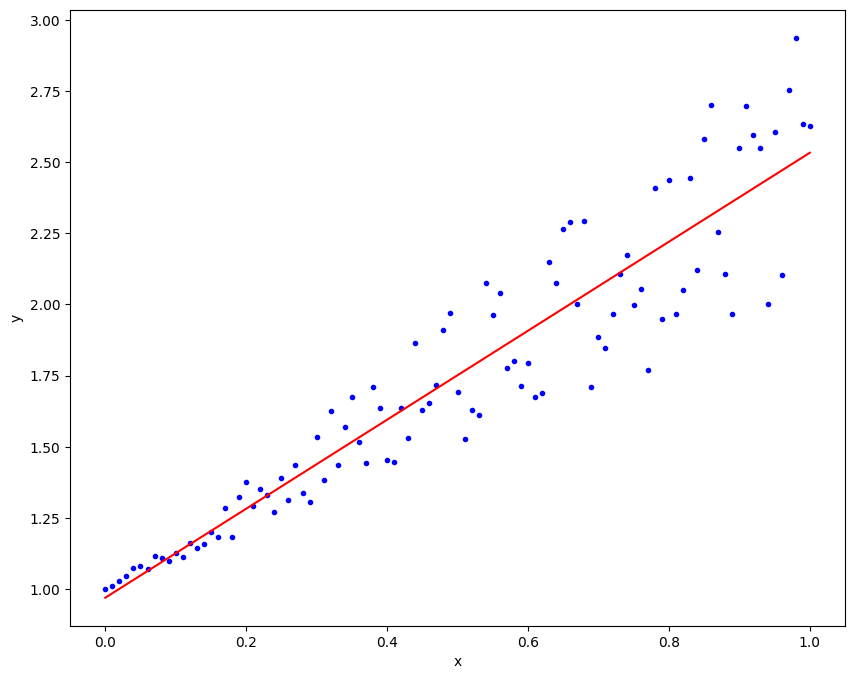

In [30]:
# Plotting

plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, alpha_1*x + alpha_2, "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## Regresi untuk Fungsi Nonlinear

Walau metode regresi kuadrat terkecil menggunakan sistem persamaan linear dalam perumusan solusinyak, kita tetap dapat menggunakan metode ini untuk fungsi-fungsi nonlinear dengan trik tertentu.

### Fungsi Eksponensial: Trik Logaritma

Untuk model $ y = c_1 e^{c_2 x} $, kita logaritmakan kedua sisi:

$$
\ln(y) = \ln(c_1) + c_2 x = \alpha_1 f_1(x) + \alpha_2 f_2(x)
$$

Dalam hal ini:

$$
\begin{align*}
\hat{y} &= \ln(y) \\
\alpha_1 &= \ln(c_1) \\
f_1(x) &= 1 \\
\alpha_2 &= c_2 \\
f_2(x) &= x
\end{align*}
$$

### Fungsi Pangkat

Jika modelnya $ y = b x^m $, kita log-kan:

$$
\ln(y) = m \ln(x) + \ln(b)
$$

Langkah regresinya identik.


## Contoh Kasus Fisika: Hukum Hooke

### Model

Hukum Hooke menyatakan $ F = kx $ dengan:
- $ F $: gaya (N),
- $ x $: simpangan (m),
- $ k $: konstanta pegas (N/m)

Untuk melakukan regresi, kita perlu:
1. Kumpulkan data eksperimen pasangan $ (x_i, F_i) $
2. Gunakan rumus least squares untuk mencari $ k $

### Algoritma

- Input: vektor x, vektor F

- Output: k
 
  Hitung
  - A ← [x]  # hanya satu basis fungsi
  - k ← (A^T A)^(-1) A^T F

Konstanta pegas (k): 10.163636363636364 N/m


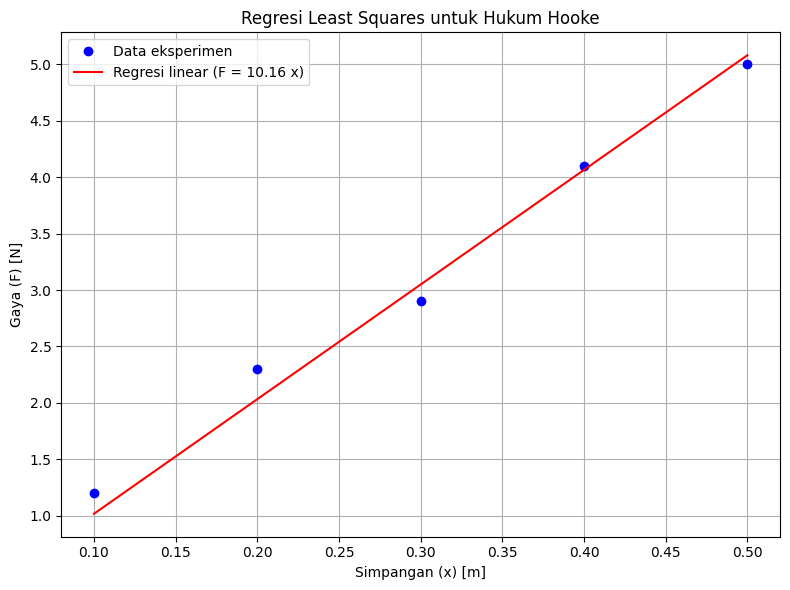

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
F = np.array([1.2, 2.3, 2.9, 4.1, 5.0])  

A = x[:, np.newaxis]
k = np.linalg.inv(A.T @ A) @ A.T @ F

print(f"Konstanta pegas (k): {k[0]} N/m")

# Plotting: 
F_fit = k[0] * x  # hasil prediksi gaya dari model regresi

# Plot hasil regresi
plt.figure(figsize=(8, 6))
plt.plot(x, F, 'bo', label='Data eksperimen')
plt.plot(x, F_fit, 'r-', label=f'Regresi linear (F = {k[0]:.2f} x)')
plt.xlabel('Simpangan (x) [m]')
plt.ylabel('Gaya (F) [N]')
plt.title('Regresi Least Squares untuk Hukum Hooke')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()